## Testing API with real receipt samples

In [1]:
# Change working directory
%cd ..

/Users/laverde/Documents/github/fix/pipeline-receipts


In [2]:
import os
import io
import matplotlib.pyplot as plt

from prepline_receipts.donut import image_generator_from_local
from prepline_receipts.donut import price_rule, select_fields, clean_fields
from prepline_receipts.donut import generate_outputs, extract_fields
from prepline_receipts.api.receipts import pipeline_api, partition_receipts

# config
CWD = os.getcwd()
SAMPLE_DOCS_DIRECTORY = CWD + "/sample-docs"
DATASET_NAME = "SROIE-test-4"
SROIE_TEST_PATH = f"{SAMPLE_DOCS_DIRECTORY}/{DATASET_NAME}"

print("SAMPLE_DOCS_DIRECTORY: ", SAMPLE_DOCS_DIRECTORY)
print("SROIE_TEST_PATH: ", SROIE_TEST_PATH)

MODEL_NAME = "donut"
SHOW = True

SAMPLE_DOCS_DIRECTORY:  /Users/laverde/Documents/github/fix/pipeline-receipts/sample-docs
SROIE_TEST_PATH:  /Users/laverde/Documents/github/fix/pipeline-receipts/sample-docs/SROIE-test-4


### Call to partition_receipts using image file

task: 		    from local parse the sample receipts with independent calls to partition_receipts
parameters: 	    do not filter fields -> include_fields is unused
            	    do not apply cleaning
model:   	    donut
dataset: 	    SROIE-test-4
number of samples:  4

receipts parser in ON!
parsing unseen receipts 🐍...


---------------------------------------------------------------------------------------------------

******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 1) *****************************

receipt_name:  X00016469671.jpg


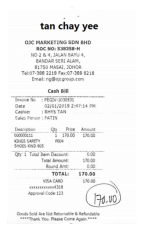

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '2:47:14',
 'TransactionDate': '02/01/2019',
 'Total': '170.00',
 'Tax': '0.00',
 'Subtotal': '170.00',
 'Menu': [{'TotalPrice': '170.00',
   'Quantity': '1',
   'Price': '170.00',
   'Name': 'KINGS SAFETY'},
  {'TotalPrice': '170.00',
   'Quantity': '1',
   'Price': 'None',
   'Name': 'SHOES KWD 805'}],
 'Items': ''}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 2) *****************************

receipt_name:  X00016469670.jpg


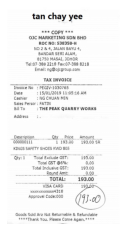

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '11:05:16',
 'TransactionDate': '15/01/2019',
 'Total': '193.00',
 'Tax': '0.00',
 'Subtotal': '193.00',
 'MerchantPhoneNumber': '+60 07 388 2218',
 'MerchantName': 'OJC MARKETING SDN BHD',
 'MerchantAddress': 'NO 2 & 4, JALAN BAYU 4, BANDAR SERI ALAM, 81750 MASAI, JOHOR',
 'Menu': {'TotalPrice': '193.00',
  'Quantity': '1',
  'Price': '193.00',
  'Name': 'KINGS SAFETY SHOES KWD 805'},
 'Items': ['KINGS SAFETY SHOES KWD 805', '193.00']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 3) *****************************

receipt_name:  X51005230605.jpg


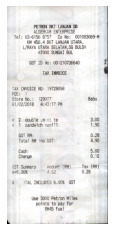

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '4:43:17',
 'TransactionDate': '01/02/2018',
 'Total': '0.28',
 'Tax': '0.28',
 'Subtotal': '4.62',
 'MerchantPhoneNumber': '036156 8757',
 'Menu': [{'TotalPrice': '3.00',
   'Quantity': '2',
   'Price': 'None',
   'Name': 'double, mint te'},
  {'TotalPrice': '1.90',
   'Quantity': '1',
   'Price': 'None',
   'Name': 'sandwich vanill'}],
 'Items': ['A 2 double, mint te 3.00', 'A 1 sandwich vanill 1.90']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 4) *****************************

receipt_name:  X51005200931.jpg


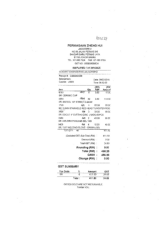

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '11:40:00',
 'TransactionDate': '01/04/2018',
 'Total': '41.50',
 'Tax': '0.61',
 'Subtotal': '41.80',
 'MerchantPhoneNumber': '+41.80 24.69',
 'MerchantName': 'PERNIAGAAN ZHENG HUI',
 'MerchantAddress': 'Nose Jalan Perinus Sdc BANDLAR BARU PERMAS S/YA',
 'TotalPrice': '11.40',
 'Quantity': '1',
 'Price': 'None',
 'Name': 'SR CERAMICCAP'}

In [3]:
print("task: \t\t    from local parse the sample receipts with independent calls to partition_receipts")
print("parameters: \t    do not filter fields -> include_fields is unused")
print("            \t    do not apply cleaning")
print("model:   \t    donut")
print("dataset: \t   ", DATASET_NAME)
print("number of samples: ", "".join([ch for ch in DATASET_NAME if ch.isnumeric()]))
print("\nreceipts parser in ON!")
print("parsing unseen receipts 🐍...")
print("\n\n---------------------------------------------------------------------------------------------------")

# generate outputs for each image
parsed_docs = []
for global_id, (image, filename) in enumerate(image_generator_from_local(path=SROIE_TEST_PATH), start=1):
    print(f"\n******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: {global_id}) *****************************")
    print(f"\nreceipt_name: ", str(filename).replace(f"{SROIE_TEST_PATH}/", ""))
    if SHOW:
        plt.figure()
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    parsed_doc = partition_receipts(file=open(filename, 'rb'))
    display(parsed_doc)
    parsed_docs.append(parsed_doc)

### Call to pipeline_api using image file

task: 		    from local parse sample receipts with independent calls to pipeline_api
parameters: 	    do not filter fields -> include_fields is unused
            	    do not apply cleaning
model:   	    donut
dataset: 	    SROIE-test-4
number of samples:  4

receipts parser in ON!
parsing unseen receipts 🐍...


---------------------------------------------------------------------------------------------------

******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 1) *****************************

receipt_name: X00016469671.jpg


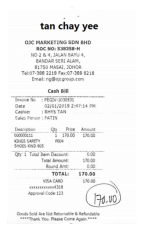

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '2:47:14',
 'TransactionDate': '02/01/2019',
 'Total': '170.00',
 'Tax': '0.00',
 'Subtotal': '170.00',
 'Menu': [{'TotalPrice': '170.00',
   'Quantity': '1',
   'Price': '170.00',
   'Name': 'KINGS SAFETY'},
  {'TotalPrice': '170.00',
   'Quantity': '1',
   'Price': 'None',
   'Name': 'SHOES KWD 805'}],
 'Items': ''}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 2) *****************************

receipt_name: X00016469670.jpg


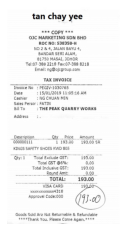

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '11:05:16',
 'TransactionDate': '15/01/2019',
 'Total': '193.00',
 'Tax': '0.00',
 'Subtotal': '193.00',
 'MerchantPhoneNumber': '+60 07 388 2218',
 'MerchantName': 'OJC MARKETING SDN BHD',
 'MerchantAddress': 'NO 2 & 4, JALAN BAYU 4, BANDAR SERI ALAM, 81750 MASAI, JOHOR',
 'Menu': {'TotalPrice': '193.00',
  'Quantity': '1',
  'Price': '193.00',
  'Name': 'KINGS SAFETY SHOES KWD 805'},
 'Items': ['KINGS SAFETY SHOES KWD 805', '193.00']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 3) *****************************

receipt_name: X51005230605.jpg


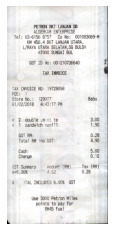

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '4:43:17',
 'TransactionDate': '01/02/2018',
 'Total': '0.28',
 'Tax': '0.28',
 'Subtotal': '4.62',
 'MerchantPhoneNumber': '036156 8757',
 'Menu': [{'TotalPrice': '3.00',
   'Quantity': '2',
   'Price': 'None',
   'Name': 'double, mint te'},
  {'TotalPrice': '1.90',
   'Quantity': '1',
   'Price': 'None',
   'Name': 'sandwich vanill'}],
 'Items': ['A 2 double, mint te 3.00', 'A 1 sandwich vanill 1.90']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 4) *****************************

receipt_name: X51005200931.jpg


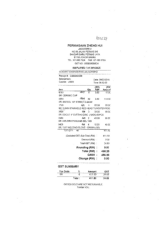

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '11:40:00',
 'TransactionDate': '01/04/2018',
 'Total': '41.50',
 'Tax': '0.61',
 'Subtotal': '41.80',
 'MerchantPhoneNumber': '+41.80 24.69',
 'MerchantName': 'PERNIAGAAN ZHENG HUI',
 'MerchantAddress': 'Nose Jalan Perinus Sdc BANDLAR BARU PERMAS S/YA',
 'TotalPrice': '11.40',
 'Quantity': '1',
 'Price': 'None',
 'Name': 'SR CERAMICCAP'}

In [4]:
print("task: \t\t    from local parse sample receipts with independent calls to pipeline_api")
print("parameters: \t    do not filter fields -> include_fields is unused")
print("            \t    do not apply cleaning")
print("model:   \t    donut")
print("dataset: \t   ", DATASET_NAME)
print("number of samples: ", "".join([ch for ch in DATASET_NAME if ch.isnumeric()]))
print("\nreceipts parser in ON!")
print("parsing unseen receipts 🐍...")
print("\n\n---------------------------------------------------------------------------------------------------")

# generate outputs for each image
parsed_docs = []
for global_id, (image, filename) in enumerate(image_generator_from_local(path=SROIE_TEST_PATH), start=1):
    print(f"\n******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: {global_id}) *****************************")
    receipt_name = str(filename).replace(f"{SROIE_TEST_PATH}/", "")
    print(f"\nreceipt_name: {receipt_name}")
    if SHOW:
        plt.figure()
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    parsed_doc = pipeline_api(file=open(filename, 'rb'))['parsed_doc']
    display(parsed_doc)
    parsed_docs.append(parsed_doc)

task: 		    from local parse sample receipts with independent calls to partition_receipts
parameters: 	    cleaning_fnc set to apply cleaning price rule (leave numeric chars only)
model:   	    donut
dataset: 	    SROIE-test-4
number of samples:  4

receipts parser in ON!
parsing unseen receipts 🐍...


---------------------------------------------------------------------------------------------------

******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 1) *****************************

receipt_name: X00016469671.jpg


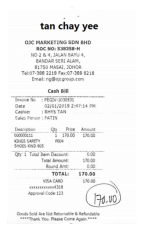

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '24714',
 'TransactionDate': '02012019',
 'Total': '170.00',
 'Tax': '0.00',
 'Subtotal': '170.00',
 'Menu': [{'TotalPrice': '170.00',
   'Quantity': '1',
   'Price': '170.00',
   'Name': ''},
  {'TotalPrice': '170.00', 'Quantity': '1', 'Price': '', 'Name': '805'}],
 'Items': ''}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 2) *****************************

receipt_name: X00016469670.jpg


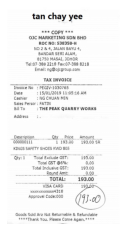

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '110516',
 'TransactionDate': '15012019',
 'Total': '193.00',
 'Tax': '0.00',
 'Subtotal': '193.00',
 'MerchantPhoneNumber': '60073882218',
 'MerchantName': '',
 'MerchantAddress': '24481750',
 'Menu': {'TotalPrice': '193.00',
  'Quantity': '1',
  'Price': '193.00',
  'Name': '805'},
 'Items': ['805', '193.00']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 3) *****************************

receipt_name: X51005230605.jpg


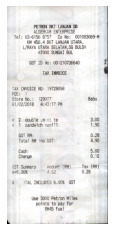

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '44317',
 'TransactionDate': '01022018',
 'Total': '0.28',
 'Tax': '0.28',
 'Subtotal': '4.62',
 'MerchantPhoneNumber': '0361568757',
 'Menu': [{'TotalPrice': '3.00', 'Quantity': '2', 'Price': '', 'Name': ''},
  {'TotalPrice': '1.90', 'Quantity': '1', 'Price': '', 'Name': ''}],
 'Items': ['23.00', '11.90']}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 4) *****************************

receipt_name: X51005200931.jpg


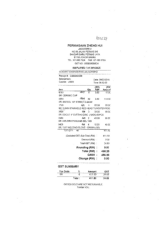

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'TransactionTime': '114000',
 'TransactionDate': '01042018',
 'Total': '41.50',
 'Tax': '0.61',
 'Subtotal': '41.80',
 'MerchantPhoneNumber': '41.8024.69',
 'MerchantName': '',
 'MerchantAddress': '',
 'TotalPrice': '11.40',
 'Quantity': '1',
 'Price': '',
 'Name': ''}

In [5]:
print("task: \t\t    from local parse sample receipts with independent calls to partition_receipts")
print("parameters: \t    cleaning_fnc set to apply cleaning price rule (leave numeric chars only)")
print("model:   \t    donut")
print("dataset: \t   ", DATASET_NAME)
print("number of samples: ", "".join([ch for ch in DATASET_NAME if ch.isnumeric()]))
print("\nreceipts parser in ON!")
print("parsing unseen receipts 🐍...")
print("\n\n---------------------------------------------------------------------------------------------------")

# generate outputs for each image
parsed_docs = []
for global_id, (image, filename) in enumerate(image_generator_from_local(path=SROIE_TEST_PATH), start=1):
    print(f"\n******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: {global_id}) *****************************")
    receipt_name = str(filename).replace(f"{SROIE_TEST_PATH}/", "")
    print(f"\nreceipt_name: {receipt_name}")
    if SHOW:
        plt.figure()
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    parsed_doc = pipeline_api(file=open(filename, 'rb'), m_cleaning_fnc=["price_rule"])['parsed_doc']
    display(parsed_doc)
    parsed_docs.append(parsed_doc)

task: 		    from local parse sample receipts with independent calls to partition_receipts
parameters: 	    filter fields -> include_fields select numeric fields by name
model:   	    donut
dataset: 	    SROIE-test-4
number of samples:  4

receipts parser in ON!
parsing unseen receipts 🐍...


---------------------------------------------------------------------------------------------------

******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 1) *****************************

receipt_name: X00016469671.jpg


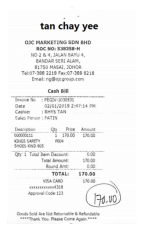

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'Total': '170.00', 'Tax': '0.00', 'Subtotal': '170.00'}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 2) *****************************

receipt_name: X00016469670.jpg


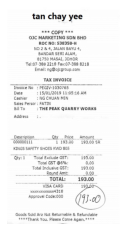

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'Total': '193.00', 'Tax': '0.00', 'Subtotal': '193.00'}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 3) *****************************

receipt_name: X51005230605.jpg


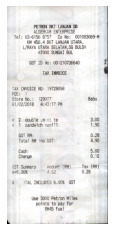

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'Total': '0.28', 'Tax': '0.28', 'Subtotal': '4.62'}


******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: 4) *****************************

receipt_name: X51005200931.jpg


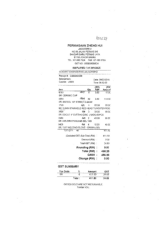

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'Total': '41.50', 'Tax': '0.61', 'Subtotal': '41.80'}

In [6]:
print("task: \t\t    from local parse sample receipts with independent calls to partition_receipts")
print("parameters: \t    filter fields -> include_fields select numeric fields by name")
print("model:   \t    donut")
print("dataset: \t   ", DATASET_NAME)
print("number of samples: ", "".join([ch for ch in DATASET_NAME if ch.isnumeric()]))
print("\nreceipts parser in ON!")
print("parsing unseen receipts 🐍...")
print("\n\n---------------------------------------------------------------------------------------------------")

# generate outputs for each image
PRETTY = True
parsed_docs = []
for global_id, (image, filename) in enumerate(image_generator_from_local(path=SROIE_TEST_PATH), start=1):
    print(f"\n******************************* ✨🧾 ¡NEW RECEIPT! 🧾✨ (global_id: {global_id}) *****************************")
    receipt_name = str(filename).replace(f"{SROIE_TEST_PATH}/", "")
    print(f"\nreceipt_name: {receipt_name}")
    if SHOW:
        plt.figure()
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    selected_fields = ['Subtotal', 'Tax', 'Total']
    parsed_doc = pipeline_api(file=open(filename, 'rb'), m_include_fields=selected_fields)['parsed_doc']
    display(parsed_doc)
    parsed_docs.append(parsed_doc)

In [7]:
# extract fields of parsed receipt sample using filename instead of file
filename = "sample-docs/SROIE-test-4/X00016469671.jpg"
parsed_doc = generate_outputs(model="donut", filename=filename)
extracted_fields = extract_fields(parsed_doc)
extracted_fields

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


(['TransactionTime',
  'TransactionDate',
  'Total',
  'Tax',
  'Subtotal',
  'Menu',
  'Items'],
 ['TotalPrice',
  'Quantity',
  'Price',
  'Name',
  'TotalPrice',
  'Quantity',
  'Price',
  'Name'])